In [22]:
import pandas as pd
import seaborn as sns

In [23]:
# import dataset(Titanic)
df = sns.load_dataset('titanic')

print(df.head())

# data preprocessing
# define label
label = df['class']

# missing values processing
mean = df['age'].mean()
df['age'] = df['age'].fillna(mean)

# create dummy variables
df = pd.get_dummies(df, drop_first=True)

   survived  pclass     sex   age  sibsp  parch     fare embarked  class   
0         0       3    male  22.0      1      0   7.2500        S  Third  \
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


## （1）PCA : 主成分分析

In [24]:
from sklearn.decomposition import PCA

# build model
pca = PCA(n_components=2)
# n_components : num of PC to keep
df_pca = pd.DataFrame(pca.fit_transform(df))
print(df_pca.head())

           0         1
0 -25.153196 -7.066090
1  39.304139  7.291206
2 -24.369777 -3.087186
3  21.048334  4.760650
4 -24.025706  5.929516


,0
0,0.934764
1,0.063452


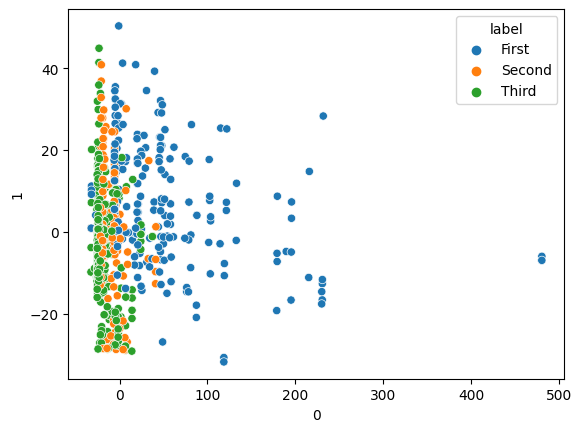

In [25]:
# visualization
df_pca['label'] = label
sns.scatterplot(data=df_pca, x=0, y=1, hue='label')

# evaluation
# contribution ratio : 
pd.DataFrame(pca.explained_variance_ratio_)

## （2）SVD : 特異値分解

In [26]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
# n_components : num of SV to keep
df_svd = pd.DataFrame(svd.fit_transform(df))
print(df_svd.head())

           0          1
0  14.375507 -18.451363
1  79.962598 -11.437717
2  16.363439 -21.944687
3  61.860088 -14.851096
4  19.535375 -30.372921


In [ ]:
# visualization
df_svd['label'] = label
sns.scatterplot(data=df_svd, x=0, y=1, hue='label')